<a href="https://colab.research.google.com/github/alessiotesse/sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all the library
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from textblob import TextBlob

In [ ]:
#We upload letta's dataset
from google.colab import files
uploaded = files.upload()

Saving letta.csv to letta.csv


In [ ]:
letta=pd.read_csv("letta.csv")
letta

,Unnamed: 0,Date,User,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language
0,0,2022-09-22 23:56:36+00:00,25_shardana,@AnnaAscani @EnricoLetta @pdnetwork @camillala...,0,0,NaN,0,0,NaN,it
1,1,2022-09-22 23:54:48+00:00,PaoloGrazioso,@Falcon74A @EnricoLetta Ma quale lavoro. Sarà ...,0,0,NaN,0,0,NaN,it
2,2,2022-09-22 23:46:32+00:00,AxiaFel,@EnricoLetta Art. 1 L’Italia è una Repubblica ...,238,36,NaN,12,0,NaN,it
3,3,2022-09-22 23:21:13+00:00,SilviaZavagno,"@EnricoLetta Voi, partito dei lavoratori, avet...",3,2,NaN,0,0,NaN,it
4,4,2022-09-22 22:44:23+00:00,Calicantoblumen,@EnricoLetta La Cistituzione l'avete calpestat...,0,0,NaN,0,0,NaN,it
...,...,...,...,...,...,...,...,...,...,...,...
9374,9374,2022-07-21 04:25:14+00:00,marco_gain,@EnricoLetta ..lo ius soli???? E l indipendenz...,0,0,NaN,0,0,NaN,it
9375,9375,2022-07-21 03:56:46+00:00,SteveRothery68,@EnricoLetta Trovati un lavoro vero : Sgarbi h...,1,0,NaN,0,0,NaN,it
9376,9376,2022-07-21 02:17:29+00:00,emilia31069737,@EnricoLetta Avete tirato troppo la corda schi...,4,0,NaN,0,0,NaN,it
9377,9377,2022-07-21 00:59:45+00:00,Omantini,@EnricoLetta @AndreaOrlandosp Lo.avete difeso?...,1,1,NaN,2,0,NaN,it


In [ ]:
#We import meloni's dataset
from google.colab import files
uploaded = files.upload()

Saving cit meloni lavoro.csv to cit meloni lavoro.csv


In [ ]:
meloni= pd.read_csv("cit meloni lavoro.csv")
meloni

,Unnamed: 0,Date,User,Coordinates,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language
0,0,2022-09-22 22:54:46+00:00,ralf0230,NaN,@GiorgiaMeloni @Antonio76732626 Sarai lo specc...,0,0,NaN,0,0,NaN,it
1,1,2022-09-22 21:33:51+00:00,SebastianoGene2,NaN,@GianniP23898215 @colvieux @rulajebreal @Giorg...,1,0,NaN,0,0,NaN,it
2,2,2022-09-22 21:31:58+00:00,matteo_nelli,NaN,@ale_colletta_ @pistgino @cosimo1976402 @Giorg...,0,0,NaN,0,0,NaN,it
3,3,2022-09-22 20:20:20+00:00,antlig77,NaN,@GuidoCrosetto @PiazzapulitaLA7 @La7tv A mio p...,5,0,NaN,0,0,NaN,it
4,4,2022-09-22 20:03:43+00:00,attiliolioi,NaN,@AnnaAscani @GiorgiaMeloni Avete fatto carne d...,14,1,['Costituzione'],1,0,NaN,it
...,...,...,...,...,...,...,...,...,...,...,...,...
5458,5458,2022-07-21 05:58:20+00:00,Donato57933616,NaN,@Pinucci63757977 @560_massimo @GiorgiaMeloni G...,0,0,NaN,0,0,NaN,it
5459,5459,2022-07-21 05:35:28+00:00,vitangelomosca9,NaN,@GiorgiaMeloni mi raccomando TABULA RASA su si...,0,0,NaN,0,0,NaN,it
5460,5460,2022-07-21 05:29:36+00:00,fpmeuron,NaN,@GiorgiaMeloni @FratellidItalia Difficile e in...,0,0,NaN,0,0,NaN,it
5461,5461,2022-07-21 05:11:30+00:00,mylae_67,NaN,"È caduto il governo. Andremo alle elezioni,dov...",0,0,"['padano', 'crisidigoverno']",0,0,NaN,it


In [ ]:
#Now we focus to find the polarity
def findPoll(review):
    return TextBlob(review).sentiment.polarity

In [ ]:
#Now we find letta's polarity
letta["Sentiment Polarity"] = letta["Tweet"].apply(findPoll)
letta

,Unnamed: 0,Date,User,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity
0,0,2022-09-22 23:56:36+00:00,25_shardana,@AnnaAscani @EnricoLetta @pdnetwork @camillala...,0,0,NaN,0,0,NaN,it,0.000000
1,1,2022-09-22 23:54:48+00:00,PaoloGrazioso,@Falcon74A @EnricoLetta Ma quale lavoro. Sarà ...,0,0,NaN,0,0,NaN,it,0.000000
2,2,2022-09-22 23:46:32+00:00,AxiaFel,@EnricoLetta Art. 1 L’Italia è una Repubblica ...,238,36,NaN,12,0,NaN,it,0.000000
3,3,2022-09-22 23:21:13+00:00,SilviaZavagno,"@EnricoLetta Voi, partito dei lavoratori, avet...",3,2,NaN,0,0,NaN,it,0.000000
4,4,2022-09-22 22:44:23+00:00,Calicantoblumen,@EnricoLetta La Cistituzione l'avete calpestat...,0,0,NaN,0,0,NaN,it,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9374,9374,2022-07-21 04:25:14+00:00,marco_gain,@EnricoLetta ..lo ius soli???? E l indipendenz...,0,0,NaN,0,0,NaN,it,0.000000
9375,9375,2022-07-21 03:56:46+00:00,SteveRothery68,@EnricoLetta Trovati un lavoro vero : Sgarbi h...,1,0,NaN,0,0,NaN,it,0.000000
9376,9376,2022-07-21 02:17:29+00:00,emilia31069737,@EnricoLetta Avete tirato troppo la corda schi...,4,0,NaN,0,0,NaN,it,0.000000
9377,9377,2022-07-21 00:59:45+00:00,Omantini,@EnricoLetta @AndreaOrlandosp Lo.avete difeso?...,1,1,NaN,2,0,NaN,it,0.416667


In [ ]:
#meloni's polarity
meloni["Sentiment Polarity"] = meloni["Tweet"].apply(findPoll)
meloni

,Unnamed: 0,Date,User,Coordinates,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity
0,0,2022-09-22 22:54:46+00:00,ralf0230,NaN,@GiorgiaMeloni @Antonio76732626 Sarai lo specc...,0,0,NaN,0,0,NaN,it,0.000000
1,1,2022-09-22 21:33:51+00:00,SebastianoGene2,NaN,@GianniP23898215 @colvieux @rulajebreal @Giorg...,1,0,NaN,0,0,NaN,it,0.333333
2,2,2022-09-22 21:31:58+00:00,matteo_nelli,NaN,@ale_colletta_ @pistgino @cosimo1976402 @Giorg...,0,0,NaN,0,0,NaN,it,0.000000
3,3,2022-09-22 20:20:20+00:00,antlig77,NaN,@GuidoCrosetto @PiazzapulitaLA7 @La7tv A mio p...,5,0,NaN,0,0,NaN,it,0.000000
4,4,2022-09-22 20:03:43+00:00,attiliolioi,NaN,@AnnaAscani @GiorgiaMeloni Avete fatto carne d...,14,1,['Costituzione'],1,0,NaN,it,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,5458,2022-07-21 05:58:20+00:00,Donato57933616,NaN,@Pinucci63757977 @560_massimo @GiorgiaMeloni G...,0,0,NaN,0,0,NaN,it,0.000000
5459,5459,2022-07-21 05:35:28+00:00,vitangelomosca9,NaN,@GiorgiaMeloni mi raccomando TABULA RASA su si...,0,0,NaN,0,0,NaN,it,0.000000
5460,5460,2022-07-21 05:29:36+00:00,fpmeuron,NaN,@GiorgiaMeloni @FratellidItalia Difficile e in...,0,0,NaN,0,0,NaN,it,0.000000
5461,5461,2022-07-21 05:11:30+00:00,mylae_67,NaN,"È caduto il governo. Andremo alle elezioni,dov...",0,0,"['padano', 'crisidigoverno']",0,0,NaN,it,0.000000


In [ ]:
#Calculate the subjectivity
def getSubjectivty(review):
    return TextBlob(review).sentiment.polarity

In [ ]:
#letta's subjectivity
letta["Sentiment Subjectivity"] = letta["Tweet"].apply(getSubjectivty)
letta

,Unnamed: 0,Date,User,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity,Sentiment Subjectivity
0,0,2022-09-22 23:56:36+00:00,25_shardana,@AnnaAscani @EnricoLetta @pdnetwork @camillala...,0,0,NaN,0,0,NaN,it,0.000000,0.000000
1,1,2022-09-22 23:54:48+00:00,PaoloGrazioso,@Falcon74A @EnricoLetta Ma quale lavoro. Sarà ...,0,0,NaN,0,0,NaN,it,0.000000,0.000000
2,2,2022-09-22 23:46:32+00:00,AxiaFel,@EnricoLetta Art. 1 L’Italia è una Repubblica ...,238,36,NaN,12,0,NaN,it,0.000000,0.000000
3,3,2022-09-22 23:21:13+00:00,SilviaZavagno,"@EnricoLetta Voi, partito dei lavoratori, avet...",3,2,NaN,0,0,NaN,it,0.000000,0.000000
4,4,2022-09-22 22:44:23+00:00,Calicantoblumen,@EnricoLetta La Cistituzione l'avete calpestat...,0,0,NaN,0,0,NaN,it,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,9374,2022-07-21 04:25:14+00:00,marco_gain,@EnricoLetta ..lo ius soli???? E l indipendenz...,0,0,NaN,0,0,NaN,it,0.000000,0.000000
9375,9375,2022-07-21 03:56:46+00:00,SteveRothery68,@EnricoLetta Trovati un lavoro vero : Sgarbi h...,1,0,NaN,0,0,NaN,it,0.000000,0.000000
9376,9376,2022-07-21 02:17:29+00:00,emilia31069737,@EnricoLetta Avete tirato troppo la corda schi...,4,0,NaN,0,0,NaN,it,0.000000,0.000000
9377,9377,2022-07-21 00:59:45+00:00,Omantini,@EnricoLetta @AndreaOrlandosp Lo.avete difeso?...,1,1,NaN,2,0,NaN,it,0.416667,0.416667


In [ ]:
#meloni's subjectivity
meloni["Sentiment Subjectivity"] = meloni["Tweet"].apply(getSubjectivty)
meloni

,Unnamed: 0,Date,User,Coordinates,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity,Sentiment Subjectivity
0,0,2022-09-22 22:54:46+00:00,ralf0230,NaN,@GiorgiaMeloni @Antonio76732626 Sarai lo specc...,0,0,NaN,0,0,NaN,it,0.000000,0.000000
1,1,2022-09-22 21:33:51+00:00,SebastianoGene2,NaN,@GianniP23898215 @colvieux @rulajebreal @Giorg...,1,0,NaN,0,0,NaN,it,0.333333,0.333333
2,2,2022-09-22 21:31:58+00:00,matteo_nelli,NaN,@ale_colletta_ @pistgino @cosimo1976402 @Giorg...,0,0,NaN,0,0,NaN,it,0.000000,0.000000
3,3,2022-09-22 20:20:20+00:00,antlig77,NaN,@GuidoCrosetto @PiazzapulitaLA7 @La7tv A mio p...,5,0,NaN,0,0,NaN,it,0.000000,0.000000
4,4,2022-09-22 20:03:43+00:00,attiliolioi,NaN,@AnnaAscani @GiorgiaMeloni Avete fatto carne d...,14,1,['Costituzione'],1,0,NaN,it,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,5458,2022-07-21 05:58:20+00:00,Donato57933616,NaN,@Pinucci63757977 @560_massimo @GiorgiaMeloni G...,0,0,NaN,0,0,NaN,it,0.000000,0.000000
5459,5459,2022-07-21 05:35:28+00:00,vitangelomosca9,NaN,@GiorgiaMeloni mi raccomando TABULA RASA su si...,0,0,NaN,0,0,NaN,it,0.000000,0.000000
5460,5460,2022-07-21 05:29:36+00:00,fpmeuron,NaN,@GiorgiaMeloni @FratellidItalia Difficile e in...,0,0,NaN,0,0,NaN,it,0.000000,0.000000
5461,5461,2022-07-21 05:11:30+00:00,mylae_67,NaN,"È caduto il governo. Andremo alle elezioni,dov...",0,0,"['padano', 'crisidigoverno']",0,0,NaN,it,0.000000,0.000000


In [ ]:
#The np.where function has the aim to assign a value according to a specific condition; in this case with "Sentiment Polarity">0 the tweet is positive, else is negative or neutral(SP==0)
letta["Opinion Label"] = np.where(letta["Sentiment Polarity"]>0, "positive", "negative")
letta["Opinion Label"][letta["Sentiment Polarity"]==0]="Neutral"
letta

,Unnamed: 0,Date,User,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity,Sentiment Subjectivity,Opinion Label
0,0,2022-09-22 23:56:36+00:00,25_shardana,@AnnaAscani @EnricoLetta @pdnetwork @camillala...,0,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
1,1,2022-09-22 23:54:48+00:00,PaoloGrazioso,@Falcon74A @EnricoLetta Ma quale lavoro. Sarà ...,0,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
2,2,2022-09-22 23:46:32+00:00,AxiaFel,@EnricoLetta Art. 1 L’Italia è una Repubblica ...,238,36,NaN,12,0,NaN,it,0.000000,0.000000,Neutral
3,3,2022-09-22 23:21:13+00:00,SilviaZavagno,"@EnricoLetta Voi, partito dei lavoratori, avet...",3,2,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
4,4,2022-09-22 22:44:23+00:00,Calicantoblumen,@EnricoLetta La Cistituzione l'avete calpestat...,0,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,9374,2022-07-21 04:25:14+00:00,marco_gain,@EnricoLetta ..lo ius soli???? E l indipendenz...,0,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
9375,9375,2022-07-21 03:56:46+00:00,SteveRothery68,@EnricoLetta Trovati un lavoro vero : Sgarbi h...,1,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
9376,9376,2022-07-21 02:17:29+00:00,emilia31069737,@EnricoLetta Avete tirato troppo la corda schi...,4,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
9377,9377,2022-07-21 00:59:45+00:00,Omantini,@EnricoLetta @AndreaOrlandosp Lo.avete difeso?...,1,1,NaN,2,0,NaN,it,0.416667,0.416667,positive


In [ ]:
#the same process we do on meloni
meloni["Opinion Label"] = np.where(meloni["Sentiment Polarity"]>0, "positive", "negative")
meloni["Opinion Label"][meloni["Sentiment Polarity"]==0]="Neutral"
meloni

,Unnamed: 0,Date,User,Coordinates,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity,Sentiment Subjectivity,Opinion Label
0,0,2022-09-22 22:54:46+00:00,ralf0230,NaN,@GiorgiaMeloni @Antonio76732626 Sarai lo specc...,0,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
1,1,2022-09-22 21:33:51+00:00,SebastianoGene2,NaN,@GianniP23898215 @colvieux @rulajebreal @Giorg...,1,0,NaN,0,0,NaN,it,0.333333,0.333333,positive
2,2,2022-09-22 21:31:58+00:00,matteo_nelli,NaN,@ale_colletta_ @pistgino @cosimo1976402 @Giorg...,0,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
3,3,2022-09-22 20:20:20+00:00,antlig77,NaN,@GuidoCrosetto @PiazzapulitaLA7 @La7tv A mio p...,5,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
4,4,2022-09-22 20:03:43+00:00,attiliolioi,NaN,@AnnaAscani @GiorgiaMeloni Avete fatto carne d...,14,1,['Costituzione'],1,0,NaN,it,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,5458,2022-07-21 05:58:20+00:00,Donato57933616,NaN,@Pinucci63757977 @560_massimo @GiorgiaMeloni G...,0,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
5459,5459,2022-07-21 05:35:28+00:00,vitangelomosca9,NaN,@GiorgiaMeloni mi raccomando TABULA RASA su si...,0,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
5460,5460,2022-07-21 05:29:36+00:00,fpmeuron,NaN,@GiorgiaMeloni @FratellidItalia Difficile e in...,0,0,NaN,0,0,NaN,it,0.000000,0.000000,Neutral
5461,5461,2022-07-21 05:11:30+00:00,mylae_67,NaN,"È caduto il governo. Andremo alle elezioni,dov...",0,0,"['padano', 'crisidigoverno']",0,0,NaN,it,0.000000,0.000000,Neutral


In [ ]:
#Here we insert the filter .isin we retrive the positive and negative
reviews1 = letta[letta['Sentiment Polarity'] == 0.0000]
cond1=letta['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
letta.drop(letta[cond1].index, inplace = True)
#print(letta.shape)
letta

,Unnamed: 0,Date,User,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity,Sentiment Subjectivity,Opinion Label
16,16,2022-09-22 21:17:57+00:00,loreafg,@concettodeluca @EnricoLetta Io guardo all' ué...,2,0,NaN,1,0,NaN,it,-0.200000,-0.200000,negative
23,23,2022-09-22 20:55:42+00:00,nadiafrancy,@EnricoLetta Quella Costituzione che voi ci av...,1,0,NaN,0,0,NaN,it,0.214286,0.214286,positive
26,26,2022-09-22 20:49:29+00:00,PippoPusante,@EnricoLetta Beh probabilmente ha notato che l...,2,0,NaN,0,0,NaN,it,-0.125000,-0.125000,negative
35,35,2022-09-22 20:22:26+00:00,fabiottofab,@RizzoGiov @EnricoLetta Vorrei ricordare che f...,1,0,NaN,0,0,NaN,it,0.416667,0.416667,positive
39,39,2022-09-22 20:16:49+00:00,CIDZ_69,@EnricoLetta L’avete violata tante volte voi l...,5,0,NaN,0,0,NaN,it,-0.017857,-0.017857,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,9328,2022-07-21 11:36:03+00:00,Luca05221254,@Monica09058845 @pdnetwork @EnricoLetta Aspett...,1,0,NaN,1,0,NaN,it,0.125000,0.125000,positive
9345,9345,2022-07-21 09:04:23+00:00,muttley_1974,@CarloCalenda @pdnetwork @Mov5Stelle @EnricoLe...,0,0,NaN,0,0,NaN,it,0.214286,0.214286,positive
9354,9354,2022-07-21 08:01:28+00:00,Oreste80718378,@EnricoLetta Caro letta far cadere draghi al m...,0,0,NaN,0,0,NaN,it,0.100000,0.100000,positive
9358,9358,2022-07-21 07:08:52+00:00,pindilino,"@EnricoLetta Vi hanno rubato la libertà, vi ha...",0,0,NaN,0,0,NaN,it,0.214286,0.214286,positive


In [ ]:
#also here we add the filter
reviews2 = meloni[meloni['Sentiment Polarity'] == 0.0000]
cond2=meloni['Sentiment Polarity'].isin(reviews2['Sentiment Polarity'])
meloni.drop(meloni[cond2].index, inplace = True)
#print(meloni.shape)
meloni

,Unnamed: 0,Date,User,Coordinates,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity,Sentiment Subjectivity,Opinion Label
1,1,2022-09-22 21:33:51+00:00,SebastianoGene2,NaN,@GianniP23898215 @colvieux @rulajebreal @Giorg...,1,0,NaN,0,0,NaN,it,0.333333,0.333333,positive
9,9,2022-09-22 19:33:56+00:00,GlaucoMagnano,NaN,@davcarretta forsea @GiorgiaMeloni fa confusi...,1,0,NaN,0,0,NaN,it,0.214286,0.214286,positive
11,11,2022-09-22 19:28:17+00:00,oldpaolo,NaN,@damorantonio @EnricoPampaloni @DSantanche @Gi...,0,0,"['governi', 'fascisti', 'leghisti', 'berluscon...",0,0,NaN,it,-0.425000,-0.425000,negative
12,12,2022-09-22 19:26:46+00:00,bartbene,NaN,@elio_vito @GiorgiaMeloni @matteosalvinimi @be...,17,2,NaN,14,0,NaN,it,0.100000,0.100000,positive
22,22,2022-09-22 17:38:44+00:00,athos73,"Coordinates(longitude=10.8768902, latitude=45....",@GingeGiange @GuidoCrosetto @GiorgiaMeloni Se ...,0,0,NaN,0,0,NaN,it,0.100000,0.100000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,5417,2022-07-21 17:34:31+00:00,FlakyTurin,NaN,@GiorgiaMeloni @FratellidItalia Oltre alle fra...,1,0,NaN,1,0,NaN,it,0.150000,0.150000,positive
5424,5424,2022-07-21 14:45:30+00:00,giubar01,NaN,@LegaSalvini @matteosalvinimi @GiorgiaMeloni @...,0,0,NaN,1,0,NaN,it,-0.050000,-0.050000,negative
5427,5427,2022-07-21 13:49:39+00:00,Jumba67,NaN,"@GiorgiaMeloni @Capezzone Adesso saranno , sar...",0,0,NaN,0,0,NaN,it,0.416667,0.416667,positive
5440,5440,2022-07-21 10:13:01+00:00,margurj,NaN,@GiorgiaMeloni @FratellidItalia Credevo una co...,4,0,NaN,0,0,NaN,it,0.100000,0.100000,positive


In [ ]:
# Let's make both the datasets balanced now. So we will just take 500 rows from both datasets and drop rest of them.
np.random.seed(10)
remove=479
dropIndices = np.random.choice(letta.index, remove, replace=False)
df_letta = letta.drop(dropIndices)
#print("Shape of letta Subset :",df_letta.shape)
df_letta

,Unnamed: 0,Date,User,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity,Sentiment Subjectivity,Opinion Label
16,16,2022-09-22 21:17:57+00:00,loreafg,@concettodeluca @EnricoLetta Io guardo all' ué...,2,0,NaN,1,0,NaN,it,-0.200000,-0.200000,negative
26,26,2022-09-22 20:49:29+00:00,PippoPusante,@EnricoLetta Beh probabilmente ha notato che l...,2,0,NaN,0,0,NaN,it,-0.125000,-0.125000,negative
35,35,2022-09-22 20:22:26+00:00,fabiottofab,@RizzoGiov @EnricoLetta Vorrei ricordare che f...,1,0,NaN,0,0,NaN,it,0.416667,0.416667,positive
39,39,2022-09-22 20:16:49+00:00,CIDZ_69,@EnricoLetta L’avete violata tante volte voi l...,5,0,NaN,0,0,NaN,it,-0.017857,-0.017857,negative
41,41,2022-09-22 20:08:52+00:00,cds1056,@EnricoLetta Per voi non esiste la Costituzion...,63,6,NaN,7,0,NaN,it,-0.125000,-0.125000,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318,9318,2022-07-21 13:33:38+00:00,FumaSilvia,@swamilee @EnricoLetta Devono mettere in campo...,1,0,NaN,1,0,NaN,it,0.150000,0.150000,positive
9325,9325,2022-07-21 11:47:54+00:00,Omar77275647,@EnricoLetta Chi era contro gli italiani quand...,0,0,NaN,0,0,NaN,it,0.066667,0.066667,positive
9327,9327,2022-07-21 11:43:46+00:00,Giusepp07923279,@EnricoLetta L'unica follia è che voi GRAN COG...,0,0,NaN,0,0,NaN,it,-0.500000,-0.500000,negative
9345,9345,2022-07-21 09:04:23+00:00,muttley_1974,@CarloCalenda @pdnetwork @Mov5Stelle @EnricoLe...,0,0,NaN,0,0,NaN,it,0.214286,0.214286,positive


In [ ]:
#Take 500 rows
np.random.seed(10)
remove =100
dropIndices = np.random.choice(meloni.index, remove, replace=False)
df_meloni = meloni.drop(dropIndices)
df_meloni

,Unnamed: 0,Date,User,Coordinates,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity,Sentiment Subjectivity,Opinion Label
1,1,2022-09-22 21:33:51+00:00,SebastianoGene2,NaN,@GianniP23898215 @colvieux @rulajebreal @Giorg...,1,0,NaN,0,0,NaN,it,0.333333,0.333333,positive
9,9,2022-09-22 19:33:56+00:00,GlaucoMagnano,NaN,@davcarretta forsea @GiorgiaMeloni fa confusi...,1,0,NaN,0,0,NaN,it,0.214286,0.214286,positive
11,11,2022-09-22 19:28:17+00:00,oldpaolo,NaN,@damorantonio @EnricoPampaloni @DSantanche @Gi...,0,0,"['governi', 'fascisti', 'leghisti', 'berluscon...",0,0,NaN,it,-0.425000,-0.425000,negative
12,12,2022-09-22 19:26:46+00:00,bartbene,NaN,@elio_vito @GiorgiaMeloni @matteosalvinimi @be...,17,2,NaN,14,0,NaN,it,0.100000,0.100000,positive
22,22,2022-09-22 17:38:44+00:00,athos73,"Coordinates(longitude=10.8768902, latitude=45....",@GingeGiange @GuidoCrosetto @GiorgiaMeloni Se ...,0,0,NaN,0,0,NaN,it,0.100000,0.100000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,5407,2022-07-21 21:06:05+00:00,smascerato,NaN,@zona_bianca @luigidimaio @GiorgiaMeloni Disoc...,0,0,NaN,0,0,NaN,it,-0.800000,-0.800000,negative
5408,5408,2022-07-21 20:47:38+00:00,Eedaii,NaN,@OrtigiaP @KasperReloaded @borghi_claudio @mat...,1,2,NaN,0,0,NaN,it,0.125000,0.125000,positive
5424,5424,2022-07-21 14:45:30+00:00,giubar01,NaN,@LegaSalvini @matteosalvinimi @GiorgiaMeloni @...,0,0,NaN,1,0,NaN,it,-0.050000,-0.050000,negative
5440,5440,2022-07-21 10:13:01+00:00,margurj,NaN,@GiorgiaMeloni @FratellidItalia Credevo una co...,4,0,NaN,0,0,NaN,it,0.100000,0.100000,positive


In [ ]:
#Count the sentiment and opinion label
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

letta['Sentiment Polarity'].apply(getAnalysis)
#Show
letta

,Unnamed: 0,Date,User,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity,Sentiment Subjectivity,Opinion Label
16,16,2022-09-22 21:17:57+00:00,loreafg,@concettodeluca @EnricoLetta Io guardo all' ué...,2,0,NaN,1,0,NaN,it,-0.200000,-0.200000,negative
23,23,2022-09-22 20:55:42+00:00,nadiafrancy,@EnricoLetta Quella Costituzione che voi ci av...,1,0,NaN,0,0,NaN,it,0.214286,0.214286,positive
26,26,2022-09-22 20:49:29+00:00,PippoPusante,@EnricoLetta Beh probabilmente ha notato che l...,2,0,NaN,0,0,NaN,it,-0.125000,-0.125000,negative
35,35,2022-09-22 20:22:26+00:00,fabiottofab,@RizzoGiov @EnricoLetta Vorrei ricordare che f...,1,0,NaN,0,0,NaN,it,0.416667,0.416667,positive
39,39,2022-09-22 20:16:49+00:00,CIDZ_69,@EnricoLetta L’avete violata tante volte voi l...,5,0,NaN,0,0,NaN,it,-0.017857,-0.017857,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,9328,2022-07-21 11:36:03+00:00,Luca05221254,@Monica09058845 @pdnetwork @EnricoLetta Aspett...,1,0,NaN,1,0,NaN,it,0.125000,0.125000,positive
9345,9345,2022-07-21 09:04:23+00:00,muttley_1974,@CarloCalenda @pdnetwork @Mov5Stelle @EnricoLe...,0,0,NaN,0,0,NaN,it,0.214286,0.214286,positive
9354,9354,2022-07-21 08:01:28+00:00,Oreste80718378,@EnricoLetta Caro letta far cadere draghi al m...,0,0,NaN,0,0,NaN,it,0.100000,0.100000,positive
9358,9358,2022-07-21 07:08:52+00:00,pindilino,"@EnricoLetta Vi hanno rubato la libertà, vi ha...",0,0,NaN,0,0,NaN,it,0.214286,0.214286,positive


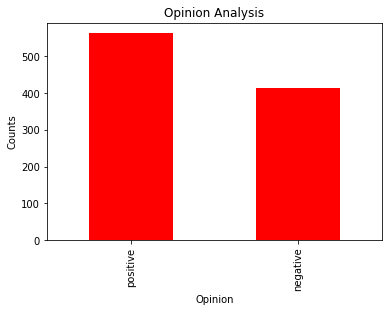

In [ ]:
#Show the value counts
opinion = letta['Opinion Label'].value_counts()

#Plot and visualize the counts
plt.title('Opinion Analysis')
plt.xlabel('Opinion')
plt.ylabel('Counts')
opinion.plot(kind='bar', color='r')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

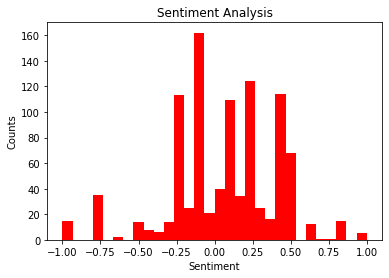

In [ ]:
#Show the sentiment counts
polarity = letta['Sentiment Polarity']

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.hist(polarity, bins=30, color='r')
plt.show

In [ ]:
#Show the value counts
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

meloni['Sentiment Polarity'].apply(getAnalysis)
#Show
meloni

,Unnamed: 0,Date,User,Coordinates,Tweet,Likes,N_Retweets,Hastags,Replies,n_quotes,Retweeted,Language,Sentiment Polarity,Opinion Label
1,1,2022-09-22 21:33:51+00:00,SebastianoGene2,NaN,@GianniP23898215 @colvieux @rulajebreal @Giorg...,1,0,NaN,0,0,NaN,it,0.333333,positive
9,9,2022-09-22 19:33:56+00:00,GlaucoMagnano,NaN,@davcarretta forsea @GiorgiaMeloni fa confusi...,1,0,NaN,0,0,NaN,it,0.214286,positive
11,11,2022-09-22 19:28:17+00:00,oldpaolo,NaN,@damorantonio @EnricoPampaloni @DSantanche @Gi...,0,0,"['governi', 'fascisti', 'leghisti', 'berluscon...",0,0,NaN,it,-0.425000,negative
12,12,2022-09-22 19:26:46+00:00,bartbene,NaN,@elio_vito @GiorgiaMeloni @matteosalvinimi @be...,17,2,NaN,14,0,NaN,it,0.100000,positive
22,22,2022-09-22 17:38:44+00:00,athos73,"Coordinates(longitude=10.8768902, latitude=45....",@GingeGiange @GuidoCrosetto @GiorgiaMeloni Se ...,0,0,NaN,0,0,NaN,it,0.100000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,5417,2022-07-21 17:34:31+00:00,FlakyTurin,NaN,@GiorgiaMeloni @FratellidItalia Oltre alle fra...,1,0,NaN,1,0,NaN,it,0.150000,positive
5424,5424,2022-07-21 14:45:30+00:00,giubar01,NaN,@LegaSalvini @matteosalvinimi @GiorgiaMeloni @...,0,0,NaN,1,0,NaN,it,-0.050000,negative
5427,5427,2022-07-21 13:49:39+00:00,Jumba67,NaN,"@GiorgiaMeloni @Capezzone Adesso saranno , sar...",0,0,NaN,0,0,NaN,it,0.416667,positive
5440,5440,2022-07-21 10:13:01+00:00,margurj,NaN,@GiorgiaMeloni @FratellidItalia Credevo una co...,4,0,NaN,0,0,NaN,it,0.100000,positive


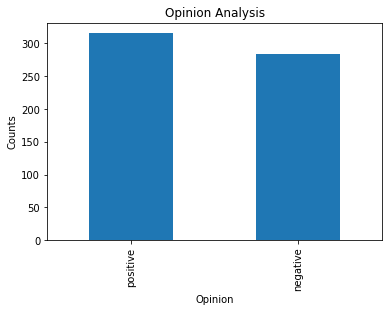

In [ ]:
#Show the value counts
opinion = meloni['Opinion Label'].value_counts()

#Plot and visualize the counts
plt.title('Opinion Analysis')
plt.xlabel('Opinion')
plt.ylabel('Counts')
opinion.plot(kind='bar')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

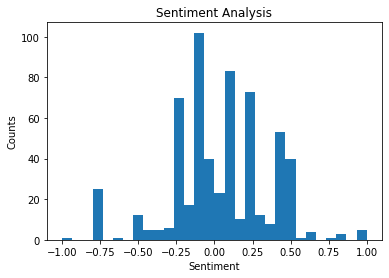

In [ ]:
#Show the sentiment counts
polarity = meloni['Sentiment Polarity']

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.hist(polarity, bins=30)
plt.show

Comparison between opinion and sentiment polarity related to 500 tweets

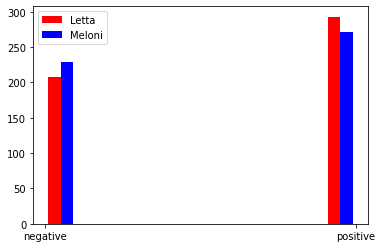

In [ ]:
#opinion comparison

op_letta = df_letta['Opinion Label']
op_meloni = df_meloni['Opinion Label']


plt.hist([op_letta, op_meloni], color=['r', 'b'], label=['Letta', 'Meloni'])
plt.legend(prop={'size':10})
plt.show()

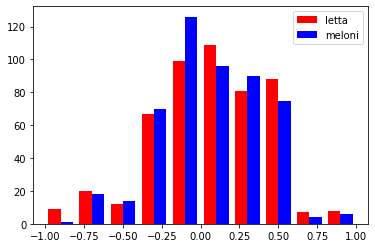

In [ ]:
#sentiment comparison

pol_letta = df_letta['Sentiment Polarity']
pol_meloni = df_meloni['Sentiment Polarity']


plt.hist([pol_letta, pol_meloni],color=['r', 'b'], label=['letta', 'meloni'])
plt.legend(prop={'size':10})
plt.show()